Notebook purpose

- Explore and sense-check tag groups and tags

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append('/Users/fgu/dev/projects/entropy')
import entropy.helpers.aws as aws
import entropy.data.cleaners as cl
import entropy.data.creators as cr

sns.set_style('whitegrid')
pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 120)
pd.set_option('max_colwidth', None)
pd.set_option('display.max_seq_items', None)
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

plotargs = dict(figsize = (10, 4))

In [2]:
SAMPLE = 'X77'
fp = f'~/tmp/entropy_{SAMPLE}.parquet'

df = aws.read_parquet(fp)
df.head(2)

,id,date,user_id,amount,desc,merchant,tag_group,tag,user_female,user_postcode,user_registration_date,user_salary_range,user_yob,account_created,account_id,account_last_refreshed,account_provider,account_type,data_warehouse_date_created,data_warehouse_date_last_updated,debit,latest_balance,merchant_business_line,tag_auto,tag_manual,tag_up,ym,balance,income
0,688261,2012-01-03,777,400.00,<mdbremoved> - s/o,NaN,transfer,transfer,False,wa1 4,2011-07-20,20k to 30k,1969.0,2011-07-20,262916,2020-07-21 20:32:00,natwest bank,current,2014-07-18,2017-11-13,True,364.220001,non merchant mbl,transfers,other account,other account,201201,-1451.075562,NaN
1,688264,2012-01-03,777,10.27,"9572 30dec11 , mcdonalds , restaurant , winwick road gb - pos",mcdonalds,spend,services,False,wa1 4,2011-07-20,20k to 30k,1969.0,2011-07-20,262916,2020-07-21 20:32:00,natwest bank,current,2014-07-18,2015-03-19,True,364.220001,mcdonalds,dining and drinking,NaN,dining and drinking,201201,-1451.075562,NaN


### Breakdown into major groups

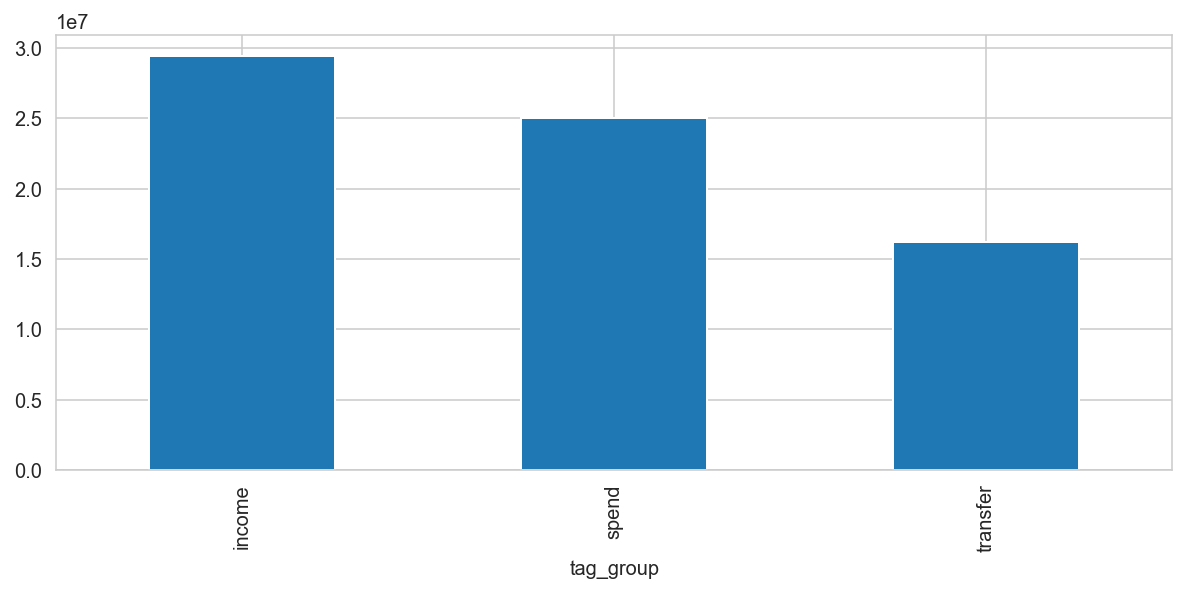

In [3]:
df.groupby('tag_group').amount.sum().abs().plot(kind='bar', **plotargs);

### Breakdown into tag variable

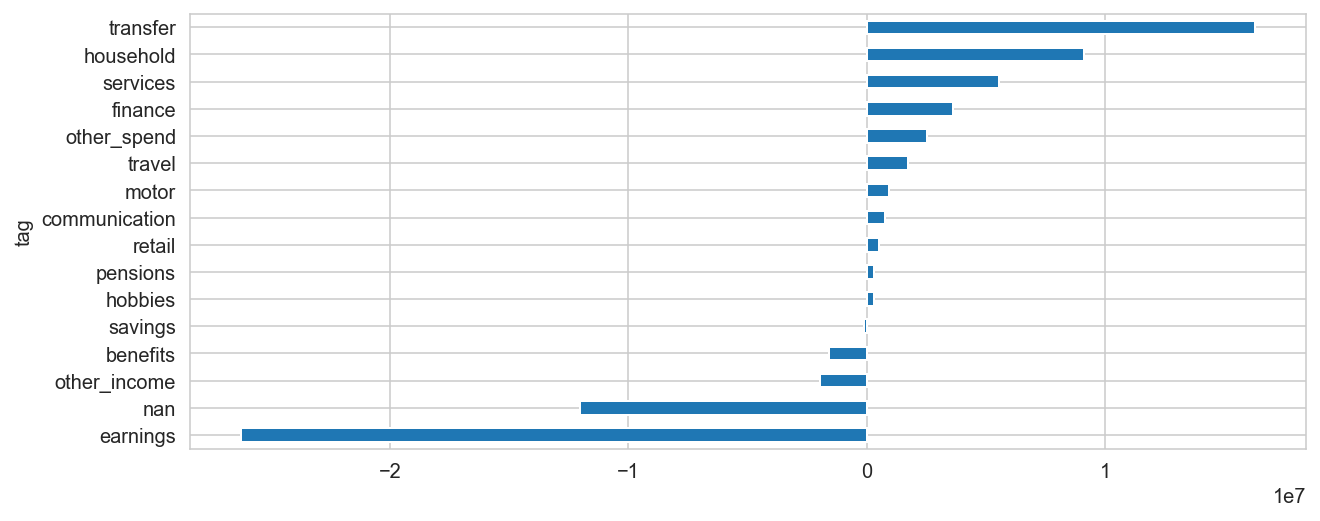

In [4]:
df.groupby('tag', dropna=False).amount.sum().round().sort_values().plot(kind='barh', **plotargs);

### Breakdown of individual tags into auto tags

`tags` has 9 different categories based on Lloyds data classification in muggleton2021evidence. `tag_auto` is MDB variable and has around 200 categories.

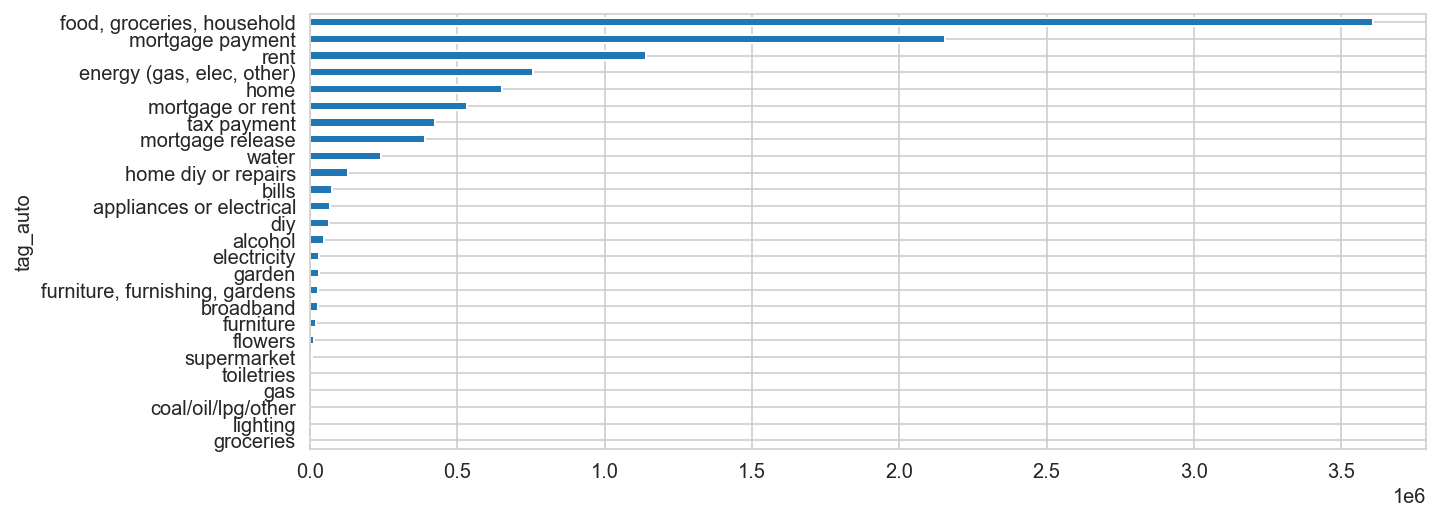

In [14]:
def breakdown(df, group_var, group_var_value, component_var, net=False):
    """Calculates sorted breakdown of group_var_value by component_var."""
    return (df[df[group_var] == group_var_value]
            .assign(amount=lambda df: df.amount if net else df.amount.abs())
            .groupby(component_var)
            .amount.sum()
            .replace(0, np.nan).dropna()
            .sort_values())

breakdown(df, 'tag', 'household', 'tag_auto').plot(kind='barh', **plotargs);

### Breakdown of auto tag into merchants

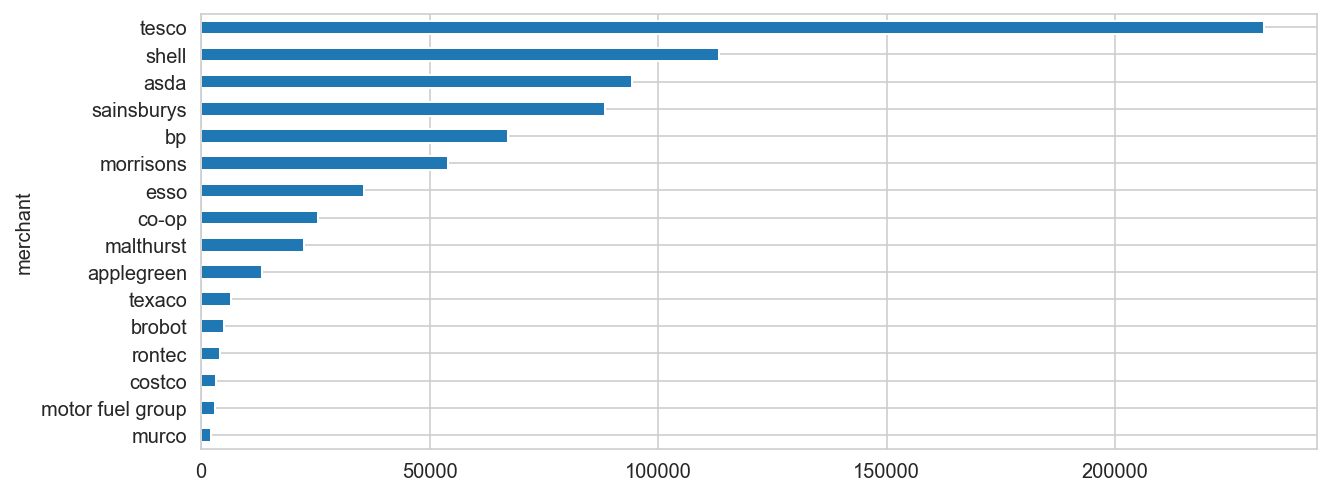

In [6]:
breakdown(df, 'tag_auto', 'fuel', 'merchant').plot(kind='barh', **plotargs);